In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [4]:
# Step 1: Generate Synthetic Dataset
np.random.seed(42)
X, _ = make_classification(n_samples=500, n_features=6, n_informative=4, 
                           n_clusters_per_class=1, random_state=42)
df = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(X.shape[1])])

# Add a categorical feature (for preprocessing demonstration)
df["Category"] = np.random.choice(["A", "B", "C"], size=len(df))

df

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Category
0,0.178293,-2.270570,-0.410813,-1.860566,-0.807720,0.371446,C
1,-0.595551,-3.169691,-2.574992,-1.529065,-1.514740,-1.160881,A
2,-0.053728,-3.575985,-0.478321,-1.906439,-1.550047,-1.176061,C
3,-0.526623,-0.682179,0.030157,0.081195,-0.479275,-1.587228,C
4,-0.380749,-2.340804,1.444269,-2.690041,-0.750194,-0.410672,A
...,...,...,...,...,...,...,...
495,-2.074949,-1.150143,-2.789342,-0.395634,-0.911255,-2.703326,B
496,-0.747565,-1.280625,0.361380,-0.854775,-0.638469,-1.584892,B
497,-3.557751,3.364098,-1.851090,0.997647,1.003593,-2.616575,A
498,-1.213482,-0.656454,-0.648542,-0.281343,-0.507426,-1.927357,B


# Data preprocessing

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Step 2: Define Preprocessing Pipeline
num_features = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
cat_features = ["Category"]

num_pipeline = Pipeline([("scaler", StandardScaler())])
cat_pipeline = Pipeline([("onehot", OneHotEncoder(drop="first"))])
preprocessor = ColumnTransformer([("num", num_pipeline, num_features), ("cat", cat_pipeline, cat_features)])

# Step 3: Transform Data
X_processed = preprocessor.fit_transform(df)

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Clustering

K-Means (k=3): Silhouette Score = 0.1825
DBSCAN: Silhouette Score = -0.1313
Agglomerative: Silhouette Score = 0.1631


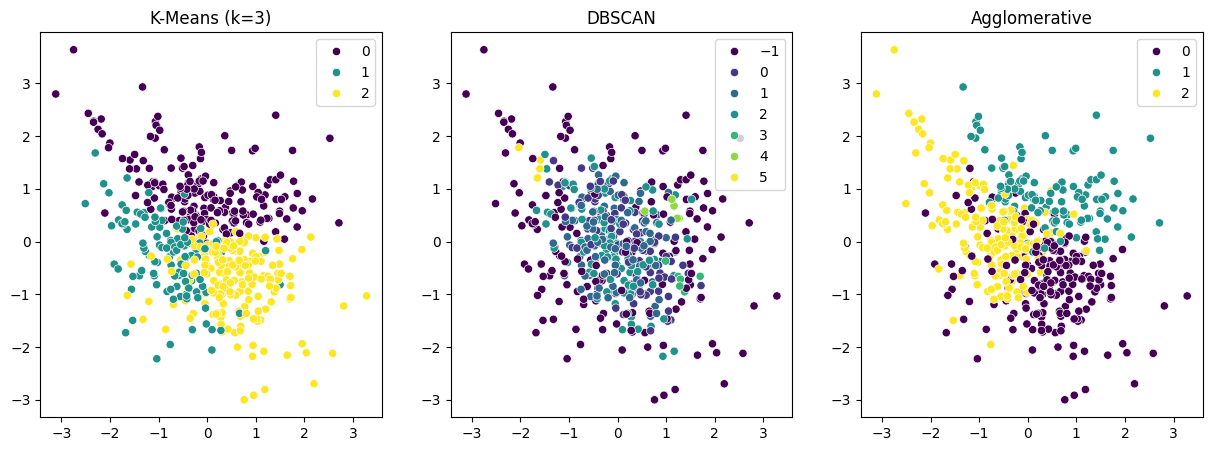

In [10]:
# Step 4: Apply Clustering Methods
def apply_clustering(model, X, name):
    clusters = model.fit_predict(X)
    score = silhouette_score(X, clusters) if len(set(clusters)) > 1 else -1
    print(f"{name}: Silhouette Score = {score:.4f}")
    return clusters

models = {
    "K-Means (k=3)": KMeans(n_clusters=3, random_state=42),
    "DBSCAN": DBSCAN(eps=1, min_samples=5),
    "Agglomerative": AgglomerativeClustering(n_clusters=3)
}

cluster_results = {name: apply_clustering(model, X_processed, name) for name, model in models.items()}

# Step 5: Visualize Results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, (name, clusters) in zip(axes, cluster_results.items()):
    sns.scatterplot(x=X_processed[:, 0], y=X_processed[:, 1], hue=clusters, palette="viridis", ax=ax)
    ax.set_title(name)

plt.show()